# Assignment 2

- Joel Oliveira - 59442
- João Braz - xxxxx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions


In [2]:
iris = load_iris()
X = iris.data[:, :2] 

y = iris.target

### Problem 4

By removing a few support vectors, the decision boundary will change, since it will have to select support vectors from the subset of available points.

<Axes: >

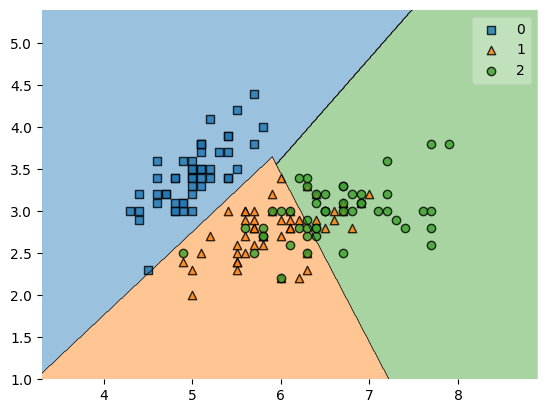

In [3]:
svc = SVC(kernel="linear").fit(X,y)

f, ax = plt.subplots(1,1)
plot_decision_regions(X, y, svc, ax=ax)

In [4]:
svc.support_vectors_.shape

(81, 2)

We will remove the first 20 support vectors from the training set

In [5]:
remove_index = []
for i in range(20):
    remove_index.append(
        np.where(
            np.logical_and(
                *(X == svc.support_vectors_[i]).T
            )
        )[0][0])
remove_index

[1, 18, 20, 25, 20, 36, 41, 12, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63]

In [6]:
small_index = pd.Index(range(len(X))).difference(remove_index)

In [7]:
small_X = X[small_index]
small_y = y[small_index]

<Axes: >

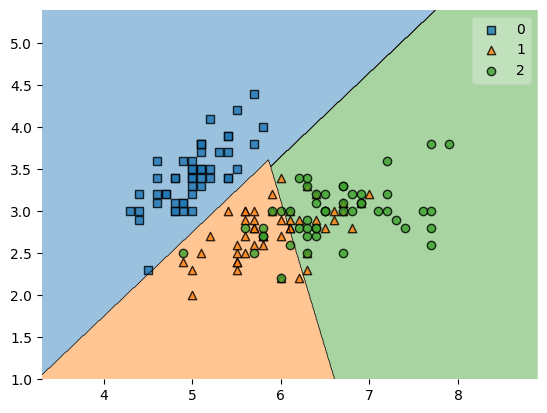

In [8]:
svc = SVC(kernel="linear").fit(small_X, small_y)

f, ax = plt.subplots(1,1)
plot_decision_regions(X, y, svc, ax=ax)

As expected, the margins changed. We can see that the orange area god smaller, and the green area got bigger. 

### Problem 5

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

> #### Using GridSearch

In [11]:
params = {
    "C":np.linspace(1, 1000, 50),
    "gamma":np.linspace(1,1000,50)
}

model = GridSearchCV(SVC(), param_grid=params, cv=5, scoring="accuracy").fit(X_train, y_train)

In [12]:
model.best_params_

{'C': 1.0, 'gamma': 1.0}

In [13]:
model.best_score_

0.7833333333333334

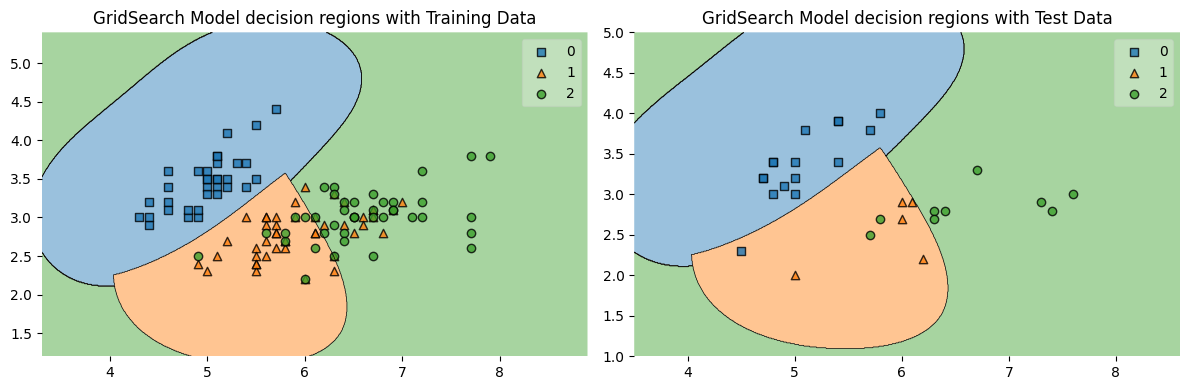

In [14]:
f,ax = plt.subplots(1,2, figsize=(12,4))
plot_decision_regions(X_train, y_train, model, ax=ax[0])
plot_decision_regions(X_test, y_test, model, ax=ax[1])
ax[1].set_title("GridSearch Model decision regions with Test Data")
ax[0].set_title("GridSearch Model decision regions with Training Data")
f.tight_layout()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.62      1.00      0.77         5
           2       1.00      0.78      0.88         9

    accuracy                           0.90        30
   macro avg       0.88      0.91      0.87        30
weighted avg       0.94      0.90      0.91        30

Accuracy = 0.9


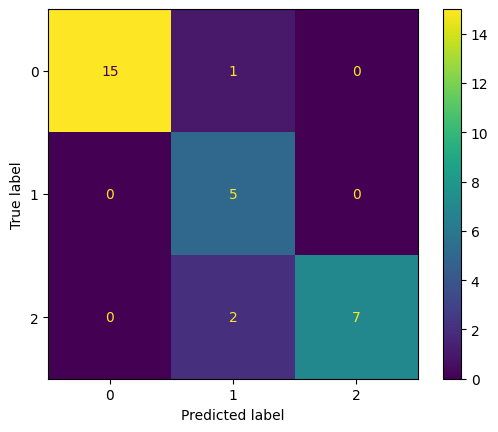

In [15]:
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print("Accuracy =", accuracy_score(y_test, preds))

ConfusionMatrixDisplay(
    confusion_matrix(y_test, preds)
).plot()

> #### Using Base Parameters

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.50      1.00      0.67         5
           2       1.00      0.56      0.71         9

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.78        30
weighted avg       0.92      0.83      0.84        30

Accuracy = 0.8333333333333334


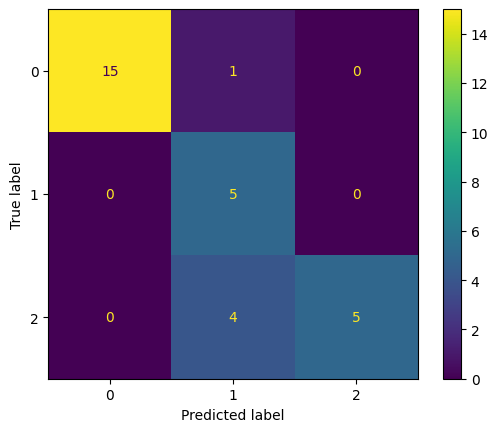

In [16]:
model = SVC().fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print("Accuracy =", accuracy_score(y_test, preds))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, preds)
).plot()

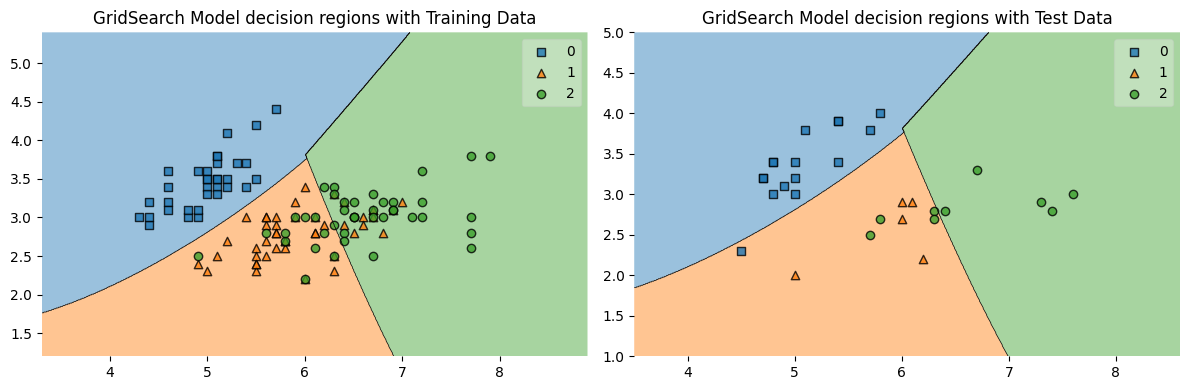

In [17]:
f,ax = plt.subplots(1,2, figsize=(12,4))
plot_decision_regions(X_train, y_train, model, ax=ax[0])
plot_decision_regions(X_test, y_test, model, ax=ax[1])
ax[1].set_title("GridSearch Model decision regions with Test Data")
ax[0].set_title("GridSearch Model decision regions with Training Data")
f.tight_layout()

**The results obtained from the GridSearch model performed better than the base model, using accuracy as a measurement.**




### Problem 6

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
data = pd.read_csv("points.csv")
data.head()

,x,y,color
0,-6.5,4.75,Red
1,-5.7,3.20,Red
2,-5.0,2.20,Red
3,-3.2,1.25,Red
4,-2.2,1.10,Red


In [20]:
encoder = LabelEncoder().fit(data.color)
color_encoded = encoder.transform(data.color)

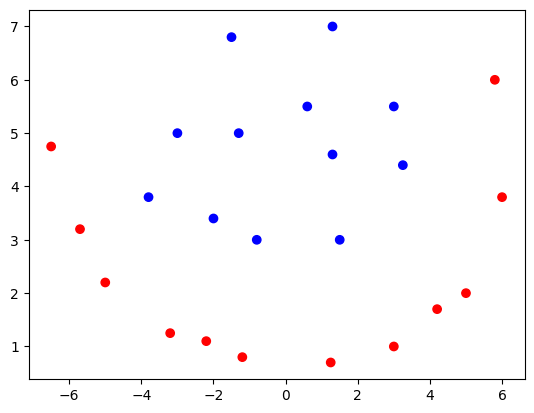

In [21]:
plt.scatter(data.x,data.y, c=data.color)

In [22]:
def plot_3d(x,y,z, label):
    f = plt.figure()
    ax = plt.axes(projection="3d")
    ax.scatter(x,y,z, c = label)
    
def transform(x,y):
    return x**2+y**2

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


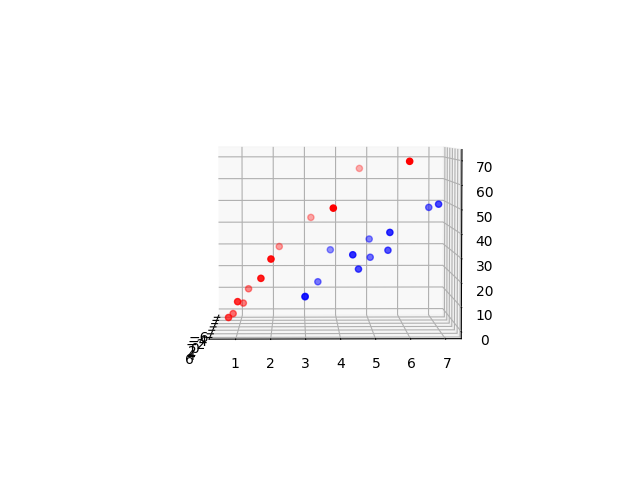

In [24]:
plot_3d(data.x, data.y, transform(data.x,data.y), data.color)

Text(0.5, 1.0, 'Y vs Z')

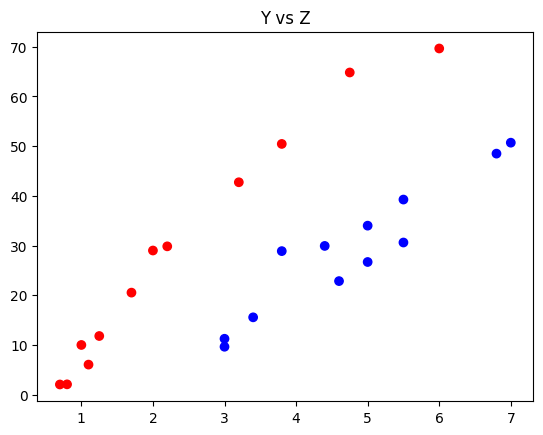

In [25]:
%matplotlib inline
plt.scatter(data.y, transform(data.x, data.y), c=data.color)

plt.title("Y vs Z")

In the 3D visualization we can see that there is a clear separation plane between both classes. Projecting the data in a 2D space using $Y$ in one axis and the new feature $Z = Y^2 + X^2$ in the other axis we can also see that there is a clear line that separates the classes

Since a polynomial transformation, with a degree level of $2$ could clearly separate the data, the kernel we will be trying is the Polynomial Kernel, with degree = $2$

In [26]:
model = SVC(kernel="poly", degree=2).fit(
    data[["x","y"]].to_numpy(), 
    color_encoded
)

In [27]:
model.score(
    data[["x","y"]].to_numpy(), 
    color_encoded
)

1.0

<Axes: >

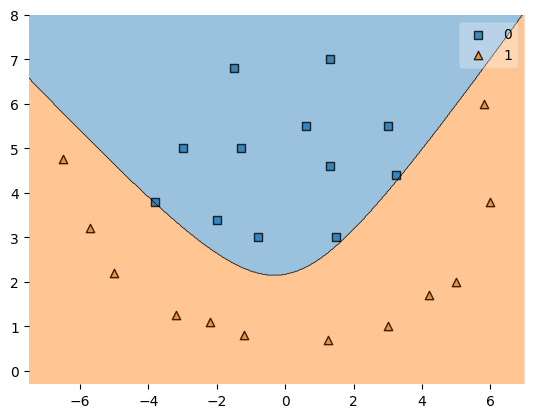

In [28]:
plot_decision_regions(
    data[["x", "y"]].to_numpy(), 
    color_encoded, 
    model
)

We can see that with the **Polynomial Kernel**, a separating hyperplane could be found that clearly separates both classes.